In [2]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("/content/Nat_Gas.csv")

### Important part
Is the preprocessing here we can see that the data is plotted against a time series, and here we convert


In [5]:
df['Dates'] = pd.to_datetime(df['Dates'])
df = df.sort_values(by='Dates')

In [6]:
df.describe()

,Dates,Prices
count,48,48.000000
mean,2022-10-15 08:00:00,11.207083
min,2020-10-31 00:00:00,9.840000
25%,2021-10-23 06:00:00,10.650000
50%,2022-10-15 12:00:00,11.300000
75%,2023-10-07 18:00:00,11.625000
max,2024-09-30 00:00:00,12.800000
std,NaN,0.757897


In [7]:
df.head()

,Dates,Prices
0,2020-10-31,10.1
1,2020-11-30,10.3
2,2020-12-31,11.0
3,2021-01-31,10.9
4,2021-02-28,10.9


In [8]:
import matplotlib.pyplot as plt

X = df['Dates']
Y = df['Prices']



/tmp/ipython-input-2754296147.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


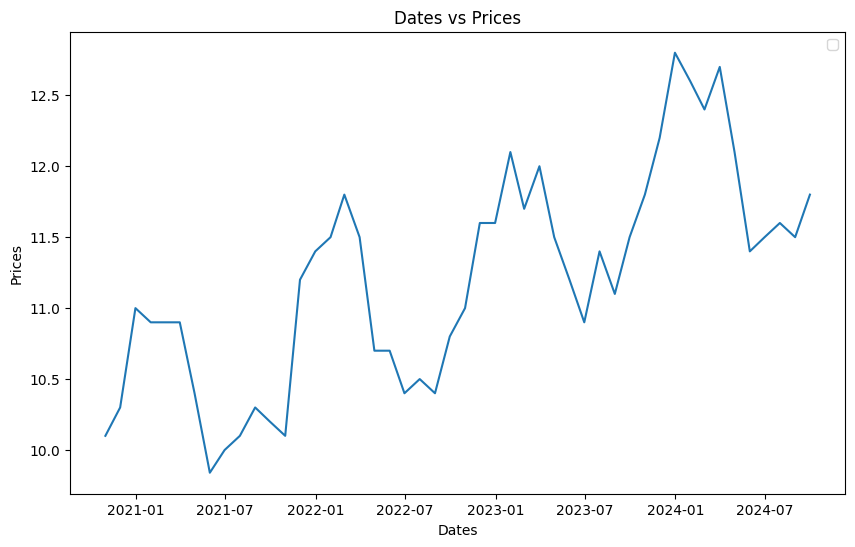

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(X ,Y)
plt.xlabel('Dates')
plt.ylabel('Prices')
plt.title('Dates vs Prices')
plt.legend()
plt.show()


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#converting dates to numbers
df['Dates_numeric'] = df['Dates'].apply(lambda x: x.timestamp())

In [16]:
X_numeric = df['Dates_numeric']
y = df['Prices']
X_train, X_test, y_train, y_test = train_test_split(X_numeric, y, train_size=0.8, random_state=42)

# Reshape X_train and X_test to 2D arrays
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)

In [17]:
Model0 = LinearRegression()
Model0.fit(X_train,y_train)

LinearRegression()

In [21]:
boi = Model0.predict(X_test)

ValueError: x and y must have same first dimension, but have shapes (10,) and (48,)

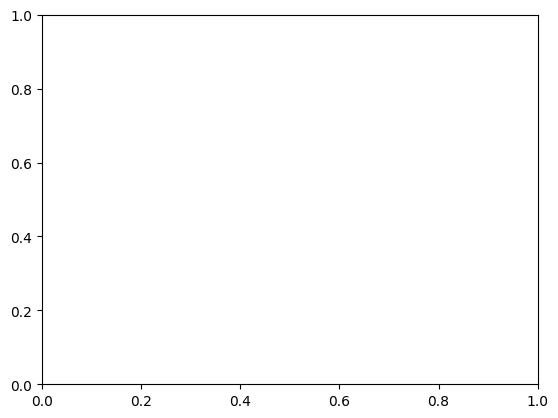

In [22]:
plt.plot(boi,y)